In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow_hub as hub

In [ ]:
train_dir = #path to mounted drive with dataset
test_dir  = #path to mounted drive with dataset

In [ ]:
from matplotlib.image import imread

dim1 = []
dim2 = []

for image_file_name in os.listdir(train_dir + '/buildings/'):
    img = imread(train_dir + '/buildings/' + image_file_name)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


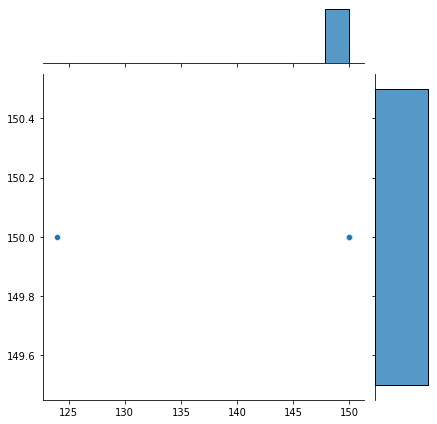

In [ ]:
sns.jointplot(dim1, dim2)

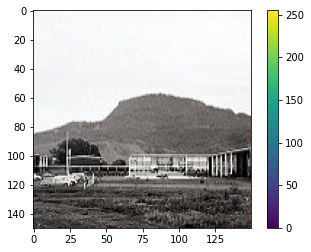

In [ ]:
plt.imshow(imread(train_dir + '/buildings/0.jpg'))
plt.colorbar()

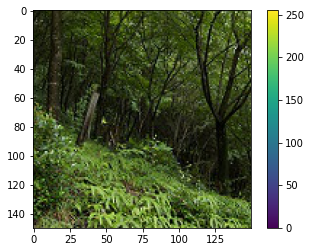

In [ ]:
plt.imshow(imread(train_dir + '/forest/10007.jpg'))
plt.colorbar()

In [ ]:
IMG_SIZE = (150, 150)

In [ ]:
import shutil

def create_train_test_split(training_dir):
    
    train_path = training_dir + 'training_set'
    test_path = training_dir + 'test_set' 
    shutil.rmtree(train_path, ignore_errors = True)
    shutil.rmtree(test_path, ignore_errors = True)
    os.mkdir(train_path)
    os.mkdir(test_path)
    for subdir in os.listdir(training_dir):
        if subdir == 'training_set' or subdir == 'test_set':
            pass
        else:
            os.mkdir(train_path + '/'+ subdir)
            os.mkdir(test_path + '/'+ subdir)
    
    for subdir in os.listdir(training_dir):
        taken = []
        if subdir == 'training_set' or subdir == 'test_set':
            pass
        else:
            for i in range(int(0.7*len(os.listdir(training_dir + subdir)))):
                train_choice = np.random.randint(low = 0, high = len(os.listdir(training_dir + subdir)))
                while train_choice in taken:
                    train_choice = np.random.randint(low = 0, high = len(os.listdir(training_dir + subdir)))
                taken.append(train_choice)
                shutil.copy(training_dir + subdir + '/' + os.listdir(training_dir + subdir)[train_choice], train_path + '/' + subdir)
                
            for i in range(int(0.3*len(os.listdir(training_dir + subdir)))):
                test_choice = np.random.randint(low = 0, high = len(os.listdir(training_dir + subdir)))
                while test_choice in taken:
                    test_choice = np.random.randint(low = 0, high = len(os.listdir(training_dir + subdir)))
                taken.append(test_choice)
                shutil.copy(training_dir + subdir + '/' + os.listdir(training_dir + subdir)[test_choice], test_path + '/' + subdir)

In [ ]:
create_train_test_split('/content/gdrive/MyDrive/Sprints-AI-Track-Competition/sprints-ai-and-ml-competition-2022-round-2/Scenes training set/Scenes training set/')

KeyboardInterrupt: ignored

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                               image_size = IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size = 32)

Found 9822 files belonging to 6 classes.
Found 4205 files belonging to 6 classes.


In [ ]:
train_data.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [ ]:
model_name = 'model_2'
checkpoint_path = f'/content/gdrive/MyDrive/Sprits-competition/{model_name}/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
model_name = 'model_0'

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_0 = model_0.fit(train_data,
                     epochs=50,
                     validation_data = test_data,
                     callbacks=[early_stop, checkpoint_callback])

Epoch 1/50
 68/307 [=====>........................] - ETA: 11:45 - loss: 0.7472 - accuracy: 0.7675

KeyboardInterrupt: ignored

In [ ]:
model_0.evaluate(test_data)

In [ ]:
model_0.save('exp1_model_0')

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),],
  name ="data_augmentation")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "C:/Users/Mohamed Ali/Downloads/sprints-ai-and-ml-competition-2022-round-2/Scenes training set/training_set/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training = True) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
model_name = 'model_1'

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input_shape = (150, 150, 3)

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                       epochs = 10,
                       validation_data = test_data,
                       callbacks = [early_stop, checkpoint_callback])

In [ ]:
model_1.save('exp_2_model_1')

In [ ]:
model_1.evaluate(test_data)

In [ ]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomFlip("vertical"),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),],
  name ="data_augmentation")

In [ ]:
history_2 = model_1.fit(train_data,
                       epochs = 10,
                       validation_data = test_data,
                       callbacks = [early_stop, checkpoint_callback])

In [ ]:
data_augmentation_1 = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomFlip("vertical"),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.Rescaling(1./255)],
  name ="data_augmentation_1")

In [ ]:
base_model_1 = tf.keras.applications.ResNet50V2(include_top=False)
base_model_1.trainable = False

input_shape = (150, 150, 3)

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation_1(inputs)

x = base_model_1(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_2.fit(train_data,
                       epochs = 10,
                       validation_data = test_data,
                       callbacks = [early_stop, checkpoint_callback])